In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [3]:
initial_data = yf.download("ATOM-USD", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,17.630102,18.652367,17.614876,18.610485,18.610485,472927334
2021-03-02,18.606085,20.366325,18.097910,18.822123,18.822123,718143875
2021-03-03,18.832088,21.890427,18.714214,21.437494,21.437494,757982550
2021-03-04,21.430944,21.661207,18.300385,18.915333,18.915333,787374729
2021-03-05,18.879860,19.210798,18.021107,18.692411,18.692411,476063491


In [5]:
initial_data['Adj Close'].head()

Date
2021-03-01    18.610485
2021-03-02    18.822123
2021-03-03    21.437494
2021-03-04    18.915333
2021-03-05    18.692411
Name: Adj Close, dtype: float64

In [6]:
data =  initial_data['Adj Close']

In [7]:
data.head()

Date
2021-03-01    18.610485
2021-03-02    18.822123
2021-03-03    21.437494
2021-03-04    18.915333
2021-03-05    18.692411
Name: Adj Close, dtype: float64

In [8]:
data.tail()

Date
2022-02-25    27.225927
2022-02-26    29.807392
2022-02-27    26.751556
2022-02-28    31.426020
2022-03-01    31.117987
Name: Adj Close, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E76DD4128>],
      dtype=object)

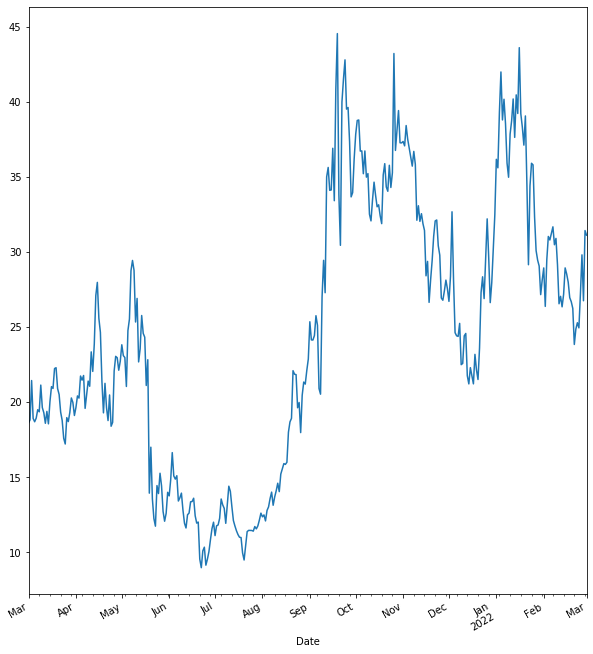

In [10]:
data.plot(figsize=(10, 12), subplots=True)

In [11]:
data.describe().round(2)

count    366.00
mean      24.39
std        9.00
min        8.97
25%       17.31
50%       23.85
75%       31.88
max       44.54
Name: Adj Close, dtype: float64

In [12]:
data.diff().head()

Date
2021-03-01         NaN
2021-03-02    0.211637
2021-03-03    2.615372
2021-03-04   -2.522161
2021-03-05   -0.222921
Name: Adj Close, dtype: float64

In [13]:
data.diff().describe().round(2)

count    365.00
mean       0.03
std        2.07
min      -10.75
25%       -0.87
50%        0.02
75%        0.98
max        9.54
Name: Adj Close, dtype: float64

In [14]:
data.pct_change().round(4).head()

Date
2021-03-01       NaN
2021-03-02    0.0114
2021-03-03    0.1390
2021-03-04   -0.1177
2021-03-05   -0.0118
Name: Adj Close, dtype: float64

In [15]:
data=pd.DataFrame(data)

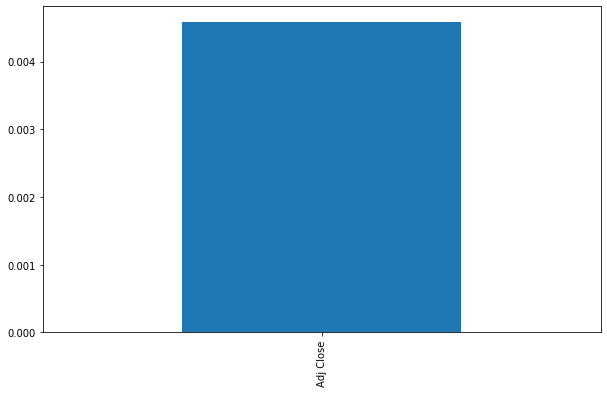

In [16]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [17]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2021-03-01,NaN
2021-03-02,0.0113
2021-03-03,0.1301
2021-03-04,-0.1252
2021-03-05,-0.0119


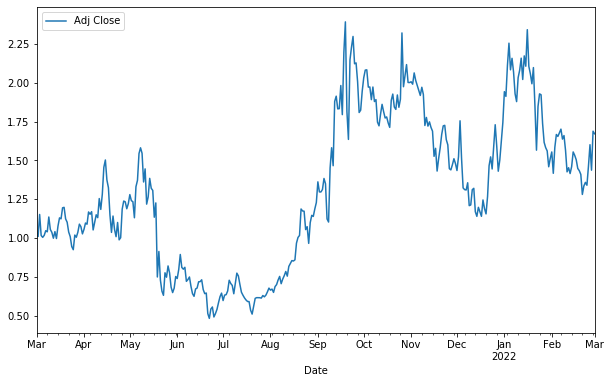

In [18]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [19]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2021-03-07,19.493658
2021-03-14,18.553705
2021-03-21,20.507261
2021-03-28,19.308496
2021-04-04,21.737732


In [20]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2021-03-31,19.110123
2021-04-30,22.727736
2021-05-31,13.994122
2021-06-30,12.003516
2021-07-31,12.606651


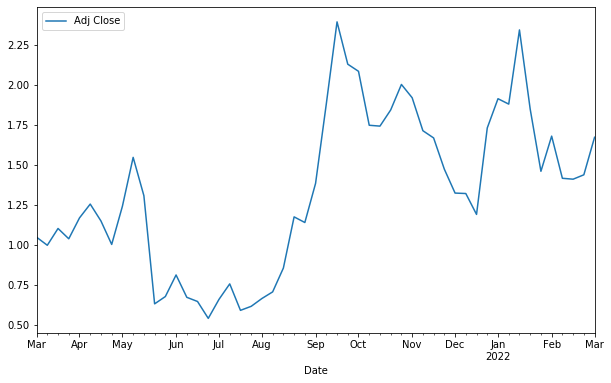

In [21]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

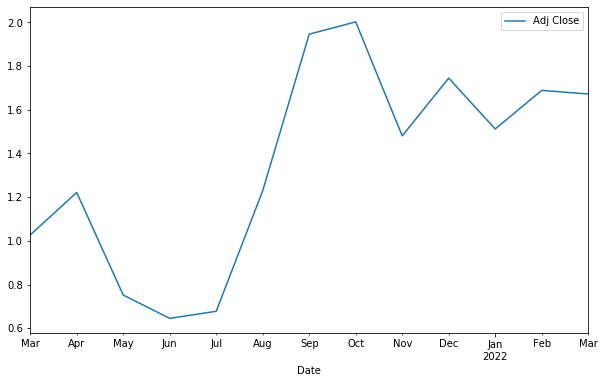

In [22]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

# VOLATILITY

In [23]:
import numpy as np
import pandas as pd

In [24]:
df = yf.download("ATOM-USD", start="2020-12-01", end="2021-12-01")

[*********************100%***********************]  1 of 1 completed


In [25]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-27,27.071278,28.073639,26.499310,26.786036,26.786036,371368644
2021-11-28,26.807396,27.608955,24.942890,27.404688,27.404688,350309894
2021-11-29,27.436737,28.421824,26.782393,28.125826,28.125826,343899962
2021-11-30,28.118610,29.364418,27.064636,27.549656,27.549656,426520757
2021-12-01,27.497738,28.268370,26.328444,26.709431,26.709431,395184173


In [26]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.043724840486740316,
 0.0007726073038484792,
 -0.07833670519530116,
 0.03644832632349148,
 -0.009451913622979312]

In [27]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.04279589196951632,
 0.0007723089964653116,
 -0.08157531214025172,
 0.03579979764563036,
 -0.00949686644290556]

In [28]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 2.85137946 and its annulized volatility is 1.57342290


In [29]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 1.62312199 and its annulized volatility is 1.56756049


# BINOMIAL TREE

In [62]:
import numpy as np
import os

In [63]:
S0 = 26.709431              # spot stock price
K = 25.000000               # strike
T = 1/52                   # maturity 
r = 0.0166                   # risk free rate 
sig = 1.57                 # diffusion coefficient or volatility
N = 4                      # number of periods or number of time steps  
payoff = "put"

In [64]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [65]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [66]:
S

array([[26.709431  , 29.78117962, 33.20619819, 37.02511494, 41.28323057],
       [ 0.        , 23.95451468, 26.709431  , 29.78117962, 33.20619819],
       [ 0.        ,  0.        , 21.48375132, 23.95451468, 26.709431  ],
       [ 0.        ,  0.        ,  0.        , 19.26783227, 21.48375132],
       [ 0.        ,  0.        ,  0.        ,  0.        , 17.28047186]])

In [67]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47317771873877723

In [68]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 3.51624868],
       [0.        , 0.        , 0.        , 0.        , 7.71952814]])

# EUROPEAN OPTION

In [69]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[1.56722756, 0.51400578, 0.        , 0.        , 0.        ],
       [0.        , 2.51344068, 0.97574993, 0.        , 0.        ],
       [0.        , 0.        , 3.89493426, 1.85229032, 0.        ],
       [0.        , 0.        , 0.        , 5.73017262, 3.51624868],
       [0.        , 0.        , 0.        , 0.        , 7.71952814]])

In [70]:
print('European ' + payoff, str( V[0,0]))

European put 1.5672275552251493


# MONTE CARLO SIMULATION

In [71]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [72]:
T = 1/52
r = 0.0166 
sigma = 1.57
S0 = 26.709431
K = 25.000000

In [73]:
S = mcs_simulation_np(1000)

In [74]:
S = np.transpose(S)
S

array([[26.709431  , 26.73859817, 26.77233236, ..., 32.19425248,
        32.46923705, 32.31536043],
       [26.709431  , 26.98764077, 27.11896803, ..., 30.55415708,
        30.38990618, 30.48810662],
       [26.709431  , 27.08320027, 27.0255891 , ..., 24.51936955,
        24.44986399, 24.68146293],
       ...,
       [26.709431  , 26.47033735, 26.857091  , ..., 35.5230538 ,
        35.522827  , 35.24778478],
       [26.709431  , 27.17756922, 27.04172083, ..., 29.85428744,
        29.71768805, 29.42509557],
       [26.709431  , 26.68362807, 26.68276511, ..., 17.40254563,
        17.51905697, 17.75060597]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

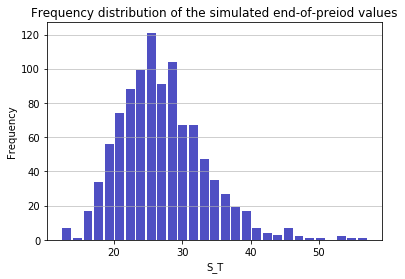

In [75]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [76]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 1.4325498366516871


# BLACK SCHOLES MODEL

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [78]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [79]:
euro_option_bs(26.709431, 25.000000, 1/52,0.166, 1.57, 'put')

1.4552628401263377

In [80]:
S = np.linspace(25.000000,27.000000,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i],26.709431, 1/52, 0.0166, 1.57, 'put')

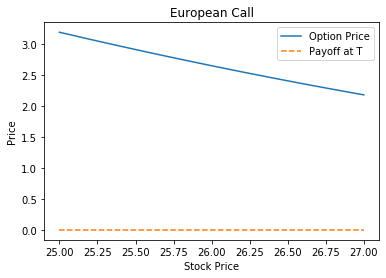

In [81]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# GREEKS

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

DELTA

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [83]:
def delta(S, K, T, r, q, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [84]:
delta(26.709431, 25.000000, 1/52, 0.0166, 0, 1.57, 'put')

-0.33939486782145456

In [85]:
S = np.linspace(25.000000,27.000000,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
        Delta_Put [i] = delta(S[i], 26.709431, 1/52, 0.0166, 0, 1.57, 'put')

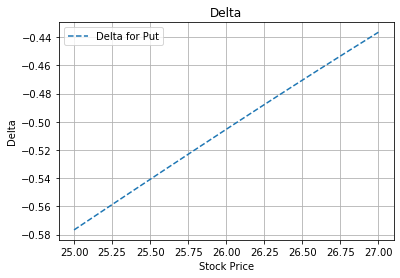

In [86]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

GAMMA

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [87]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [88]:
gamma(26.709431, 25.000000, 1/52,0.0166, 0, 1.57, 'put')

0.06296635643744365

In [89]:
S = np.linspace(25.000000,27.000000,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 26.709431, 1/52, 0.0166, 0, 1.57, 'put')

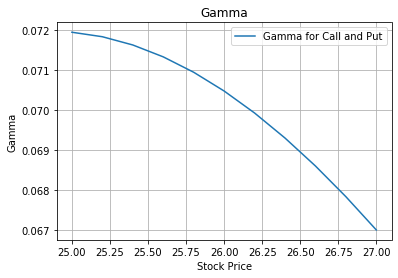

In [90]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

THETA

In [91]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [92]:
theta(26.709431, 25.00000, 1/52,1.66, 0, 1.57, 'put')

66.31079314730837

In [93]:
T = np.linspace(25.000000,27.000000,11)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
        Theta_Put [i] = theta(26.709431, 25.000000, T[i], 1.66, 0, 1.57, 'put')

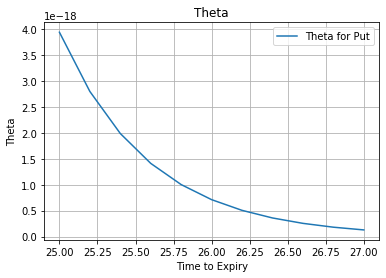

In [94]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

RHO

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [95]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [96]:
rho(26.709431, 25.000000, 1/52,1.66, 0, 1.57, 'put')

-0.17059292198144874

In [97]:
r = np.linspace(25.000000,27.000000,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
        Rho_Put [i] = rho(26.709431, 25.000000, 1/52, 1.66, 0, 1.57, 'put')

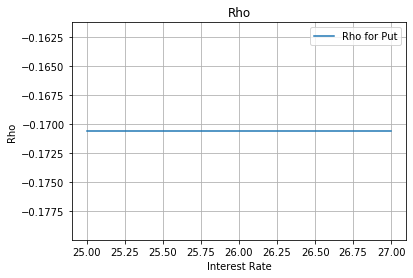

In [98]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

VEGA

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [99]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [100]:
vega(26.709431, 25.000000, 1/52,1.66, 0, 1.57, 'put')

1.2637239618292437

In [101]:
vol = np.linspace(25.000000,27.000000,11)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(26.709431, 25.000000, 1/52,1.66, 0, vol[i], 'put')

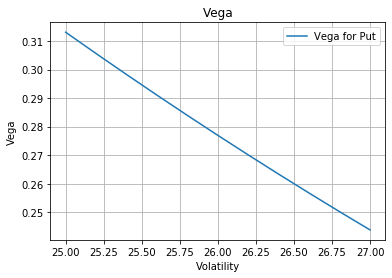

In [102]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega' )
plt.legend(['Vega for Put'])